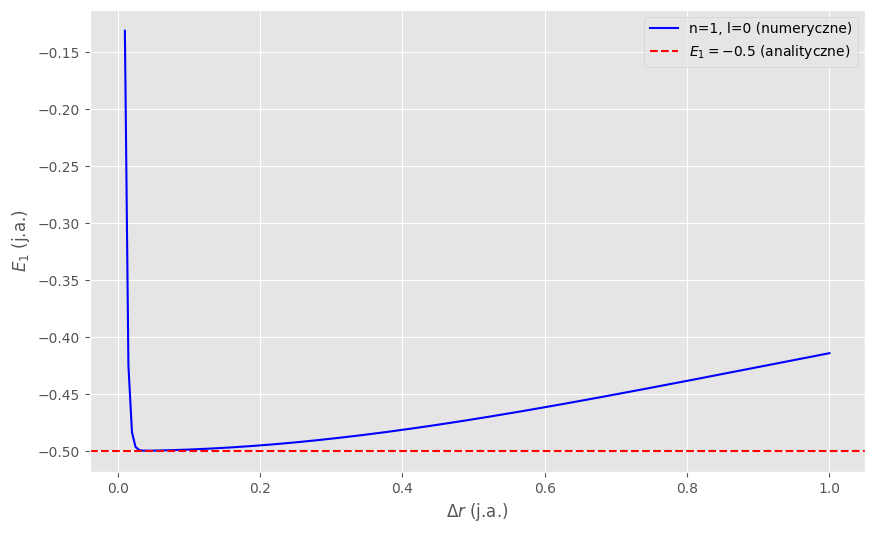

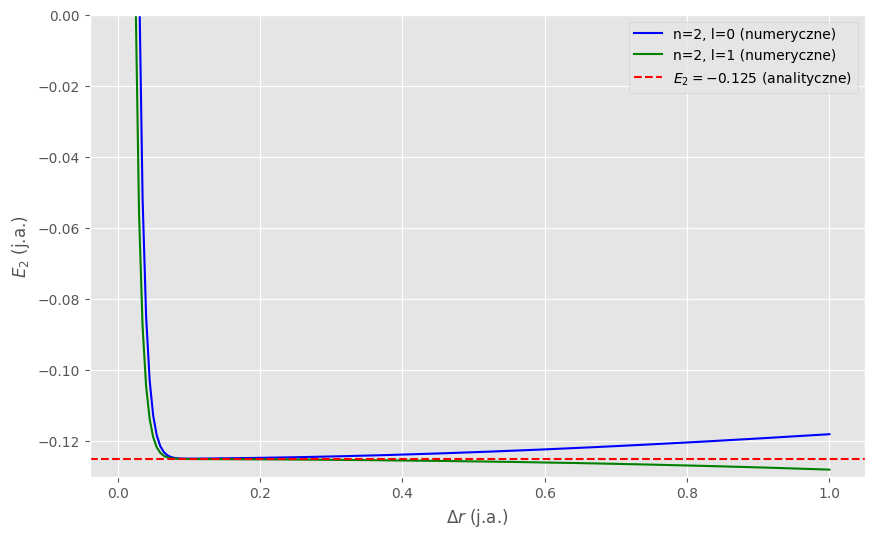

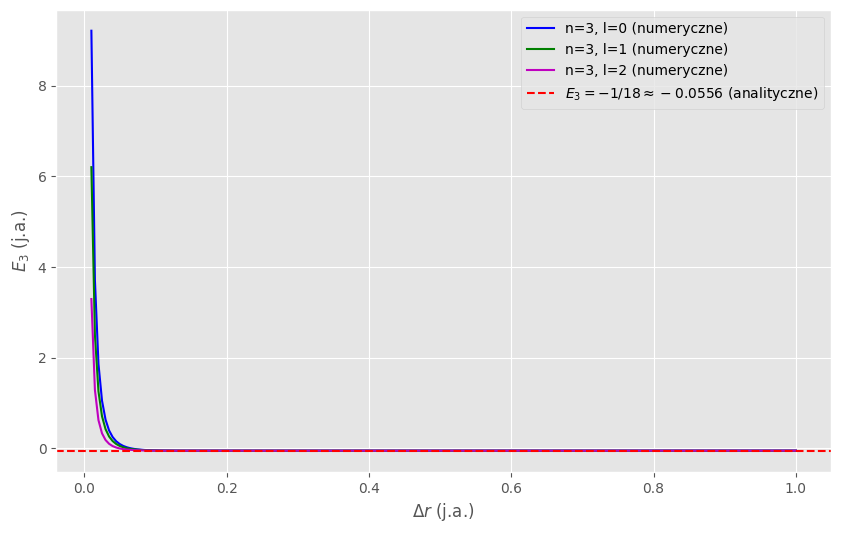

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh

def build_hamiltonian(N, dr, l):

    diag_const = 1.0 / (dr**2)
    off_diag_const = -1.0 / (2.0 * dr**2)
    
    r = np.arange(1, N + 1) * dr
    
    l_term = 0.5 * l * (l + 1) / (r**2)
    coulomb_term = -1.0 / r
    W = l_term + coulomb_term
    

    H = np.diag(diag_const + W) + np.diag(np.full(N-1, off_diag_const), k=1) + np.diag(np.full(N-1, off_diag_const), k=-1)
    
    return H

# Zadanie 2: Zależność energii własnych od Delta r 

N = 200 
dr_values = np.linspace(0.01, 1, 200)

E1_l0 = []
E2_l0, E2_l1 = [], []
E3_l0, E3_l1, E3_l2 = [], [], []

for dr in dr_values:
    # l = 0
    H_l0 = build_hamiltonian(N, dr, l=0)
    eigvals_l0, _ = eigh(H_l0)
    E1_l0.append(eigvals_l0[0]) # n=1 (stan podstawowy)
    E2_l0.append(eigvals_l0[1]) # n=2
    E3_l0.append(eigvals_l0[2]) # n=3
    
    # l = 1
    H_l1 = build_hamiltonian(N, dr, l=1)
    eigvals_l1, _ = eigh(H_l1)
    # stan o najniższej energii to n=2
    E2_l1.append(eigvals_l1[0]) # n=2
    E3_l1.append(eigvals_l1[1]) # n=3

    # l = 2
    H_l2 = build_hamiltonian(N, dr, l=2)
    eigvals_l2, _ = eigh(H_l2)
    # stan o najniższej energii to n=3
    E3_l2.append(eigvals_l2[0]) # n=3


plt.style.use('ggplot')

plt.figure(figsize=(10, 6))
plt.plot(dr_values, E1_l0, 'b-', label='n=1, l=0 (numeryczne)')
plt.axhline(y=-1.0/2.0, color='r', linestyle='--', label=r'$E_1 = -0.5$ (analityczne)')
# plt.title('Energia stanu podstawowego $E_{n=1}$ vs $\Delta r$')
plt.xlabel(r'$\Delta r$ (j.a.)')
plt.ylabel(r'$E_1$ (j.a.)')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(dr_values, E2_l0, 'b-', label='n=2, l=0 (numeryczne)')
plt.plot(dr_values, E2_l1, 'g-', label='n=2, l=1 (numeryczne)')
plt.axhline(y=-1.0/8.0, color='r', linestyle='--', label=r'$E_2 = -0.125$ (analityczne)')
# plt.title('Energia stanu $E_{n=2}$ vs $\Delta r$')
plt.xlabel(r'$\Delta r$ (j.a.)')
plt.ylabel(r'$E_2$ (j.a.)')
plt.ylim(-0.13, 0)
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(dr_values, E3_l0, 'b-', label='n=3, l=0 (numeryczne)')
plt.plot(dr_values, E3_l1, 'g-', label='n=3, l=1 (numeryczne)')
plt.plot(dr_values, E3_l2, 'm-', label='n=3, l=2 (numeryczne)')
plt.axhline(y=-1.0/18.0, color='r', linestyle='--', label=r'$E_3 = -1/18 \approx -0.0556 $ (analityczne)')
# plt.title(r'Energia stanu $E_{n=3}$ vs $\Delta r$')
plt.xlabel(r'$\Delta r$ (j.a.)')
plt.ylabel(r'$E_3$ (j.a.)')
# plt.ylim(-0.13, 0)

plt.legend()
plt.grid(True)
plt.show()

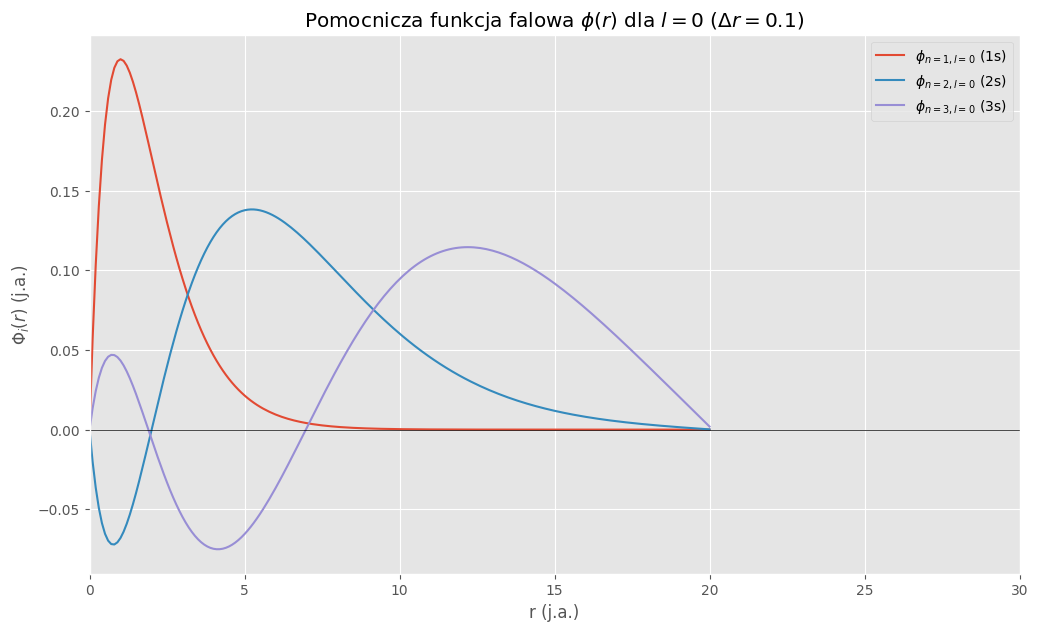

In [48]:


def build_hamiltonian(N, dr, l):
    diag_const = 1.0 / (dr**2)
    off_diag_const = -1.0 / (2.0 * dr**2)
    r = np.arange(1, N + 1) * dr
    l_term = 0.5 * l * (l + 1) / (r**2)
    coulomb_term = -1.0 / r
    W = l_term + coulomb_term
    H = np.diag(diag_const + W) + np.diag(np.full(N-1, off_diag_const), k=1) + np.diag(np.full(N-1, off_diag_const), k=-1)
    return H


DR_OPTIMAL = 0.1 
N = 200
L = 0 

H = build_hamiltonian(N, DR_OPTIMAL, L)
eigenvalues, eigenvectors = eigh(H)

phi_n1 = eigenvectors[:, 0]
phi_n2 = eigenvectors[:, 1]
phi_n3 = eigenvectors[:, 2]


r = np.arange(1, N + 1) * DR_OPTIMAL

r_plot = np.insert(r, 0, 0)
phi_n1_plot = np.insert(phi_n1, 0, 0)
phi_n2_plot = np.insert(phi_n2, 0, 0)
phi_n3_plot = np.insert(phi_n3, 0, 0)

# # zmiana na dodatnie na początku
# if phi_n1_plot[1] < 0: phi_n1_plot *= -1
# if phi_n2_plot[1] < 0: phi_n2_plot *= -1
# if phi_n3_plot[1] < 0: phi_n3_plot *= -1
    
plt.figure(figsize=(12, 7))
plt.plot(r_plot, phi_n1_plot, label=r'$\phi_{n=1, l=0}$ (1s)')
plt.plot(r_plot, phi_n2_plot, label=r'$\phi_{n=2, l=0}$ (2s)')
plt.plot(r_plot, phi_n3_plot, label=r'$\phi_{n=3, l=0}$ (3s)')

plt.title(rf'Pomocnicza funkcja falowa $\phi(r)$ dla $l=0$ ($\Delta r = {DR_OPTIMAL}$)')
plt.xlabel('r (j.a.)')
plt.ylabel(r'$\Phi_i(r)$ (j.a.)')
plt.legend()
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.xlim(0, 30)

plt.show()


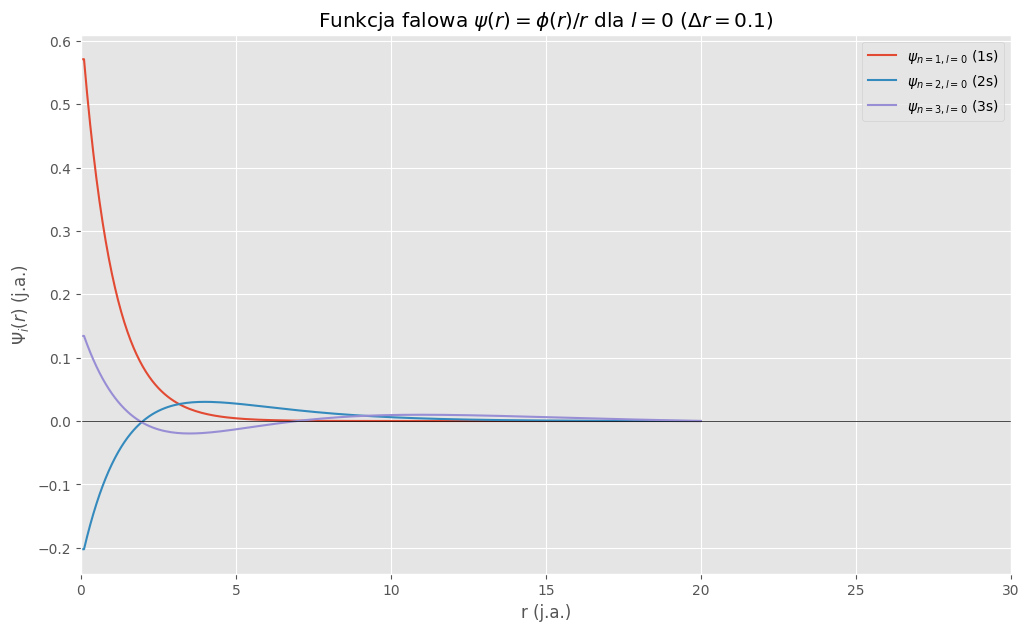

In [49]:

# def build_hamiltonian(N, dr, l):
#     diag_const = 1.0 / (dr**2)
#     off_diag_const = -1.0 / (2.0 * dr**2)
#     r = np.arange(1, N + 1) * dr
#     l_term = 0.5 * l * (l + 1) / (r**2)
#     coulomb_term = -1.0 / r
#     W = l_term + coulomb_term
#     H = np.diag(diag_const + W) + np.diag(np.full(N-1, off_diag_const), k=1) + np.diag(np.full(N-1, off_diag_const), k=-1)
#     return H


# DR_OPTIMAL = 0.1
# N = 200
# L = 0

H = build_hamiltonian(N, DR_OPTIMAL, L)
eigenvalues, eigenvectors = eigh(H)

phi_n1 = eigenvectors[:, 0]
phi_n2 = eigenvectors[:, 1]
phi_n3 = eigenvectors[:, 2]

# if phi_n1[0] < 0: phi_n1 *= -1
# if phi_n2[0] < 0: phi_n2 *= -1
# if phi_n3[0] < 0: phi_n3 *= -1
    
r = np.arange(1, N + 1) * DR_OPTIMAL

psi_n1 = phi_n1 / r
psi_n2 = phi_n2 / r
psi_n3 = phi_n3 / r

psi_0_n1 = phi_n1[0] / DR_OPTIMAL
psi_0_n2 = phi_n2[0] / DR_OPTIMAL
psi_0_n3 = phi_n3[0] / DR_OPTIMAL

r_plot = np.insert(r, 0, 0)
psi_n1_plot = np.insert(psi_n1, 0, psi_0_n1)
psi_n2_plot = np.insert(psi_n2, 0, psi_0_n2)
psi_n3_plot = np.insert(psi_n3, 0, psi_0_n3)
    
plt.figure(figsize=(12, 7))
plt.plot(r_plot, psi_n1_plot, label=r'$\psi_{n=1, l=0}$ (1s)')
plt.plot(r_plot, psi_n2_plot, label=r'$\psi_{n=2, l=0}$ (2s)')
plt.plot(r_plot, psi_n3_plot, label=r'$\psi_{n=3, l=0}$ (3s)')

plt.title(rf'Funkcja falowa $\psi(r) = \phi(r)/r$ dla $l=0$ ($\Delta r = {DR_OPTIMAL}$)')
plt.xlabel('r (j.a.)')
plt.ylabel(r'$\Psi_i(r)$ (j.a.)')
plt.legend()
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.xlim(0, 30)
plt.show()